In [3]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

## Random process definition

In [5]:
def ar_process(N, alpha):
    
    X = []
    X_actual = 0
    for i in range(1,N):
        X_plus = alpha * X_actual + np.random.randn() 
        X.append(X_plus)
        X_actual = X_plus
        
    return X

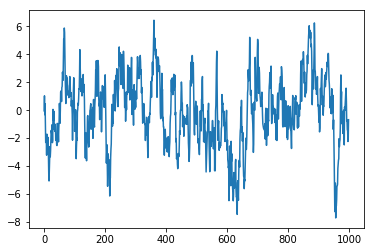

In [6]:
N = 1000
alpha = 0.9
X = []
X_actual = 0
for i in range(1,N):
    X_plus = alpha * X_actual + np.random.randn() 
    X.append(X_plus)
    X_actual = X_plus

plt.plot(X)
plt.show()

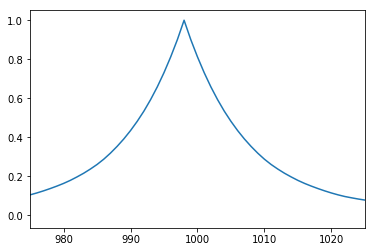

In [7]:
N = 1000
alpha = 0.9
Nrealisations = 100
R = np.zeros(2*N-3)

for j in range(Nrealisations):
    X = []
    X_actual = 0
    for i in range(1,N):
        X_plus = alpha * X_actual + np.random.randn() 
        X.append(X_plus)
        X_actual = X_plus
    R += np.correlate(X,X, mode='full')
        
R = R/Nrealisations

plt.plot(R/max(R))
plt.xlim([1000-25,1000+25])
plt.show()

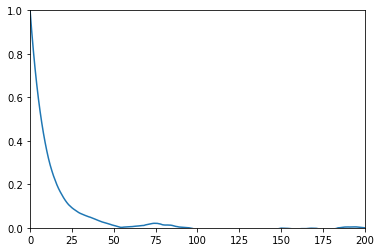

In [8]:
psd = np.fft.fftshift(R)
plt.plot(psd/psd[0])
plt.xlim([0,200])
plt.ylim([0,1])
plt.show()

 ## Wavelet packet decomposition

In [9]:
wavelet_decomposition = pywt.wavedec(X, 'db1', level = 3)

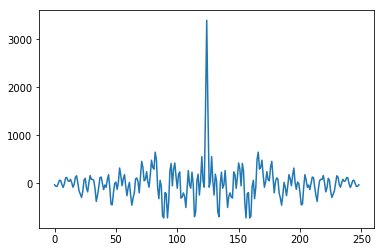

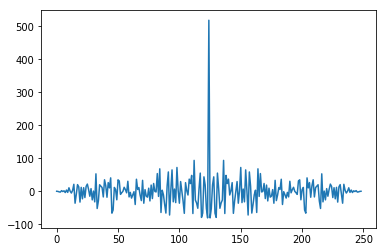

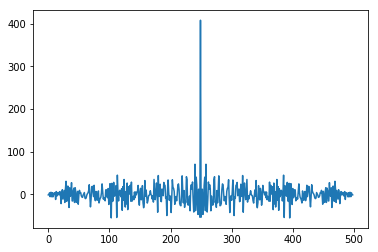

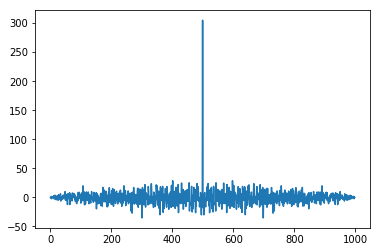

999


In [10]:
for coefs in wavelet_decomposition:

    Rca = np.correlate(coefs,coefs, mode='full')

    plt.plot(Rca)
    plt.show()
    
print(len(Rca))

Distance to white noise for level 1: 1967.1644912640354


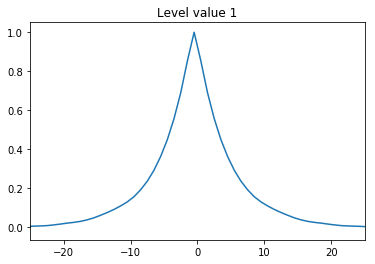

Distance to white noise for level 2: 978.4310987114728


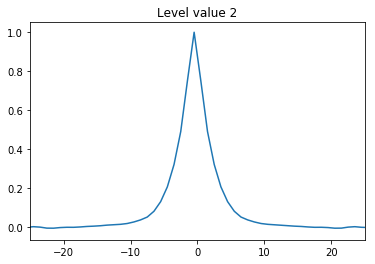

Distance to white noise for level 3: 538.9498772084032


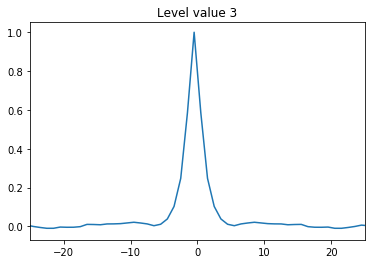

Distance to white noise for level 4: 293.7883667890647


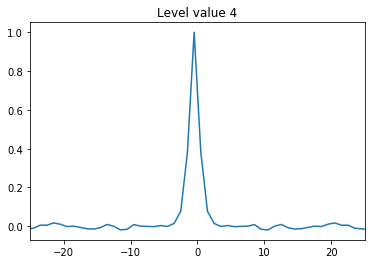

Distance to white noise for level 5: 160.73194381095425


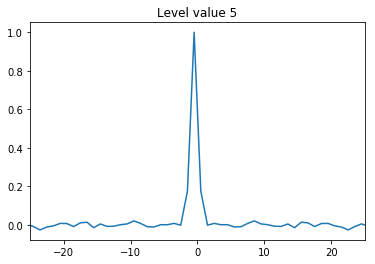

Distance to white noise for level 6: 89.88561064336716


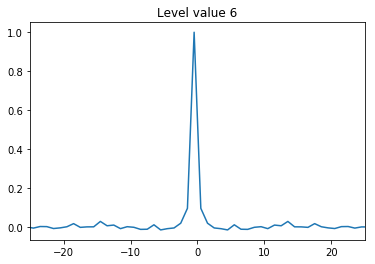

In [29]:
maxLevel = 7
Nrealisations = 100
N = 2000
alpha = 0.9
delta = 25

for level in range(1,maxLevel):
    
    # AR process
    
    X = ar_process(N, alpha)
    
    coefs = pywt.wavedec(X, 'db1', level = level)
    
    R = np.correlate(coefs[0],coefs[0], mode='full')
    
    for j in range(Nrealisations):
        
        X = ar_process(N, alpha)

        coefs = pywt.wavedec(X, 'db1', level = level)
                
        R += np.correlate(coefs[0],coefs[0], mode='full')
    
    R = R/Nrealisations
    
    
    # white noise

    Nwn = len(coefs[0])
    R_white_noise = np.zeros(2*Nwn-1)

    for j in range(Nrealisations):

        X = np.random.randn(Nwn)

        R_white_noise += np.correlate(X,X, mode='full')

    R_white_noise = R_white_noise/Nrealisations

    distance = np.mean(abs(R_white_noise[int(len(R)/2)-delta:int(len(R)/2)+delta]-R[int(len(R)/2)-delta:int(len(R)/2)+delta]))
    
    print("Distance to white noise for level "+str(level)+": "+str(distance))
    
    ## plot
    
    t_axis = range(0, len(R))
    t_axis = t_axis - len(R)/2 * np.ones(len(t_axis))


    plt.figure()
    plt.plot(t_axis,R/max(R))
    plt.title("Level value "+str(level))
    plt.xlim([-25,25])
    plt.show()

In [20]:
from tslearn.metrics import soft_dtw
soft_dtw(R_white_noise, R, gamma = 0)

2851.4212349416043

In [47]:
maxLevel = 15
Nrealisations = 100
N = 50000
alpha = 0.9
delta = 25

distances = []

for level in range(0,maxLevel):
    
    # AR process
    
    X = ar_process(N, alpha)
    
    coefs = pywt.wavedec(X, 'db1', level = level)
    
    R = np.correlate(coefs[0],coefs[0], mode='full')
    
    for j in range(Nrealisations):
        
        X = ar_process(N, alpha)

        coefs = pywt.wavedec(X, 'db1', level = level)
                
        R += np.correlate(coefs[0],coefs[0], mode='full')
    
    R = R/Nrealisations
    
    
    # white noise

    Nwn = len(coefs[0])
    R_white_noise = np.zeros(2*Nwn-1)

    for j in range(Nrealisations):

        X = np.random.randn(Nwn)

        R_white_noise += np.correlate(X,X, mode='full')

    R_white_noise = R_white_noise/Nrealisations

    distance = np.mean(abs(R_white_noise[int(len(R)/2)-delta:int(len(R)/2)+delta]-R[int(len(R)/2)-delta:int(len(R)/2)+delta]))
    distances.append(distance)

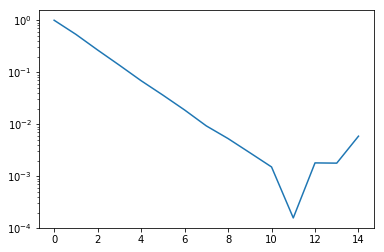

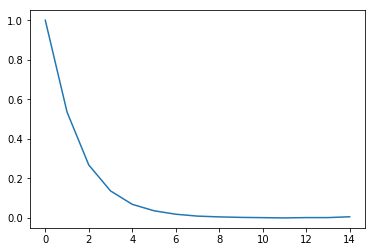

In [50]:
plt.plot(distances/max(distances))
plt.yscale('log')
plt.show()

plt.plot(distances/max(distances))
plt.show()

In [49]:
distances

[92722.57310307,
 49676.08179250506,
 24838.800109701115,
 12684.806529953441,
 6379.402218475431,
 3375.597082923041,
 1746.1270296597295,
 862.3507732139342,
 492.06484000829585,
 263.27689717468854,
 140.0618729191184,
 14.658275637519873,
 167.49877369204276,
 165.70062459664393,
 547.0958251817806]

In [57]:
maxLevel = 10
Nrealisations = 100
N = 5000
alphas = [0.2,0.4,0.6,0.9]
delta = 25
index = 0

distances_alpha = []

for alpha in alphas:

    distances = []

    for level in range(0,maxLevel):

        # AR process

        X = ar_process(N, alpha)

        coefs = pywt.wavedec(X, 'db1', level = level)

        R = np.correlate(coefs[0],coefs[0], mode='full')

        for j in range(Nrealisations):

            X = ar_process(N, alpha)

            coefs = pywt.wavedec(X, 'db1', level = level)

            R += np.correlate(coefs[0],coefs[0], mode='full')

        R = R/Nrealisations


        # white noise

        Nwn = len(coefs[0])
        R_white_noise = np.zeros(2*Nwn-1)

        for j in range(Nrealisations):

            X = np.random.randn(Nwn)

            R_white_noise += np.correlate(X,X, mode='full')

        R_white_noise = R_white_noise/Nrealisations

        distance = np.mean(abs(R_white_noise[int(len(R)/2)-delta:int(len(R)/2)+delta]-R[int(len(R)/2)-delta:int(len(R)/2)+delta]))
        distances.append(distance)
    distances_alpha.append(distances)
    index += 1

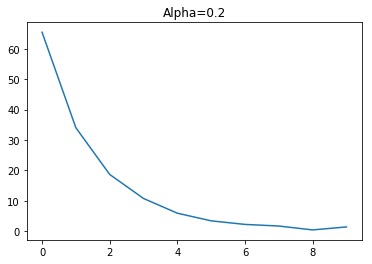

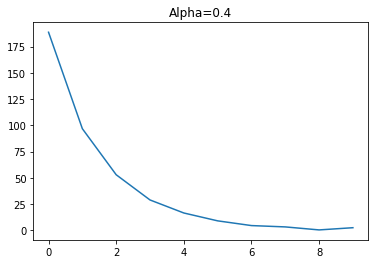

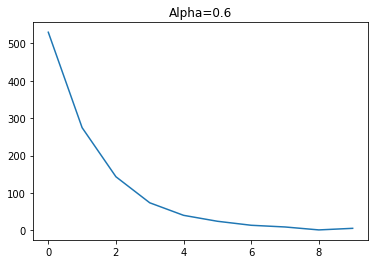

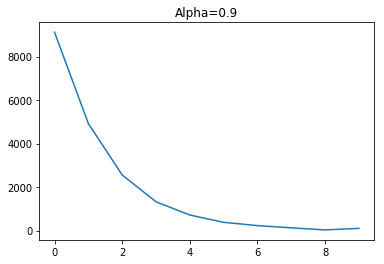

In [68]:
for i in range(len(alphas)):

    plt.plot(distances_alpha[i])
    plt.title("Alpha="+str(alphas[i]))
    plt.show()

In [56]:
distances_alpha

[1.2953380378405497, 2.3448380974200322, 5.986801867443881, 81.67761121180108]